In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
sns.set()

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE
pd.set_option('display.max_columns', 500)
df = pd.read_excel('data_akbilgic.xlsx', index_col=0, skiprows=[0])
df.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
scaler = preprocessing.MinMaxScaler()
X = df.drop(['ISE', 'ISE.1'], axis=1).values
X = scaler.fit_transform(X)
y = df['ISE.1']
y = scaler.fit_transform(y.values.reshape(-1, 1))

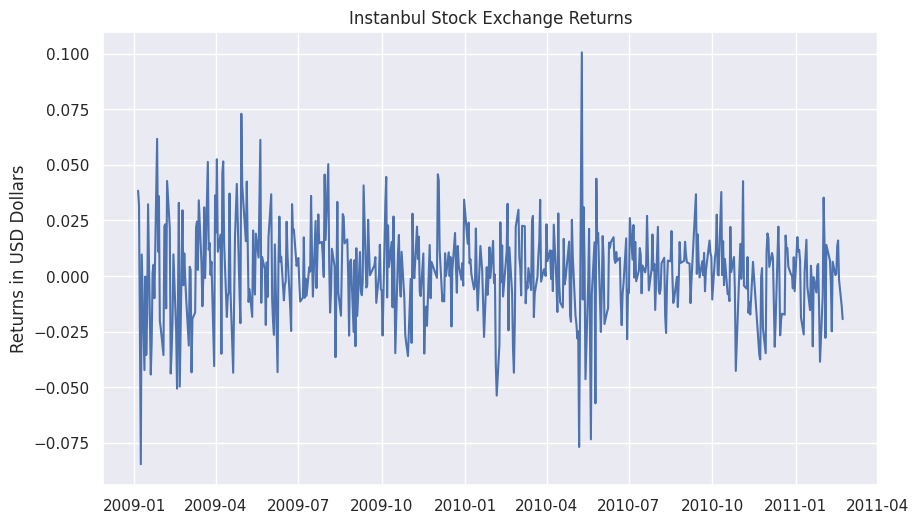

In [ ]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title("Instanbul Stock Exchange Returns")
plt.ylabel("Returns in USD Dollars")
plt.plot(df['ISE.1']);

In [ ]:
def design_matrix(X, N, J):
  # J basis functions obtained by k-means clustering
  # sigma set equal to the standard deviation of the entire data
  J = 20
  kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
  # Design matrix
  U = np.zeros((N, J))
  for i in range(N):
      for j in range(J):
          U[i][j] = np.linalg.norm(X[i] - kmeans.cluster_centers_[j])
  return U

def values_scatter(name, yTarget, yEst):
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(yTarget, yEst)
    plt.title(name + " (Values Prediction)", fontsize=18)
    plt.xlabel("True Values", fontsize=16)
    plt.ylabel("Predicted Values", fontsize=16)
    
    
def weights_scatter(name, wTrue, wEst):
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(wTrue, wEst)
    plt.title(name + " (Weights Prediction)", fontsize=18)
    plt.xlabel("True Weights", fontsize=16)
    plt.ylabel("Predicted Weights", fontsize=16)
    

def compare_series(yTarget, yEst):
    plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Time Series Comparison: Estimated vs Actual ", fontsize=18)
    plt.plot(yEst, label='Estimated', color='r')
    plt.plot(yTarget, label='Actual', color='g')
    plt.xlabel("X", fontsize=16)
    plt.ylabel("Y", fontsize=16)
    plt.legend(fontsize=15)
    plt.legend()

def plotting(Eplot, title, plot=True):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Eplot)
    plt.title(title, fontsize=18)
    plt.xlabel("Iterations", fontsize=16)
    plt.ylabel("Residual Error", fontsize=16)
    print("Training Error: ", Eplot[len(Eplot)-1][0])
    plt.show()

def sgd(X, yTarget, MaxIter, lRate, alpha=0, plot=True):
    Eplot = np.zeros((MaxIter, 1))
    wIter = np.random.randn(X.shape[1], 1)
    for itern in range(MaxIter):
        rand_sample = random.randint(0, X.shape[0]-1)
        x_rand_sample = np.reshape(X[rand_sample, :], (X[rand_sample, :].shape[0], 1)) 
        y_rand_sample = yTarget[rand_sample,:]
        yPred = x_rand_sample.T @ wIter
        wIter = wIter - lRate  * x_rand_sample * (yPred - y_rand_sample) + alpha * wIter
        Eplot[itern] = np.linalg.norm(X @ wIter - yTarget)
    
    if plot==True:
      plotting(Eplot,"Linear Regression SGD", plot)
    
    return wIter, Eplot[len(Eplot)-1][0]

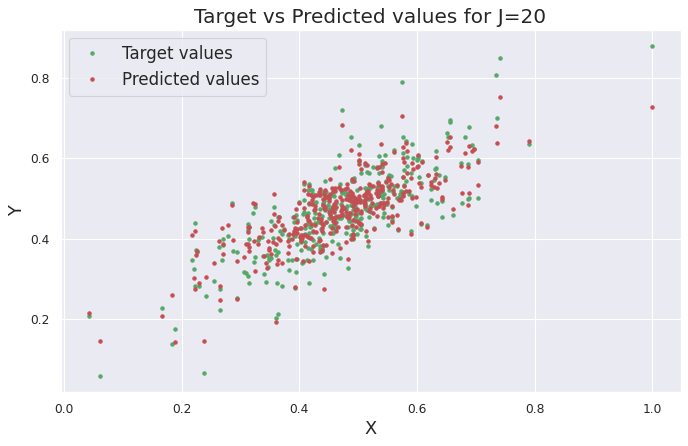

Target Training Error:  1.4292900244611648
RBF Training Predicted Moore-Penrose inverse Error:  1.3957232088763007
Target Test Error:  1.065090406047125
RBF Test Predicted Moore-Penrose inverse Error:  5.354178301869616


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

N = X_train.shape[0]
J = 20

# Solving linear regression, plotting targets and predictions
w = (np.linalg.inv(X_train.T @ X_train)) @ X_train.T @ y_train
yh_lin = X_train @ w
y_t = X_test @ w
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Target vs Predicted values for J="+str(J), fontsize=18)
plt.plot(y_train, yh_lin, '.', Color='g', label='Target values')

# Solving RBF model, predicting and plotting using Moore-Penrose inverse
U = design_matrix(X_train, N, J)
w = np.dot((np.linalg.inv(np.dot(U.T, U))), U.T) @ y_train
yh_rbf = np.dot(U, w)
plt.plot(y_train, yh_rbf, '.', Color='r', label='Predicted values')
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.legend(fontsize=15)
plt.show()
print("Target Training Error: ", np.linalg.norm(y_train-yh_lin))
print("RBF Training Predicted Moore-Penrose inverse Error: ", np.linalg.norm(y_train-yh_rbf))

U_test = design_matrix(X_test, len(X_test), J)
y_rbf_t = np.dot(U_test, w)
print("Target Test Error: ", np.linalg.norm(y_test-y_t))
print("RBF Test Predicted Moore-Penrose inverse Error: ", np.linalg.norm(y_test-y_rbf_t))

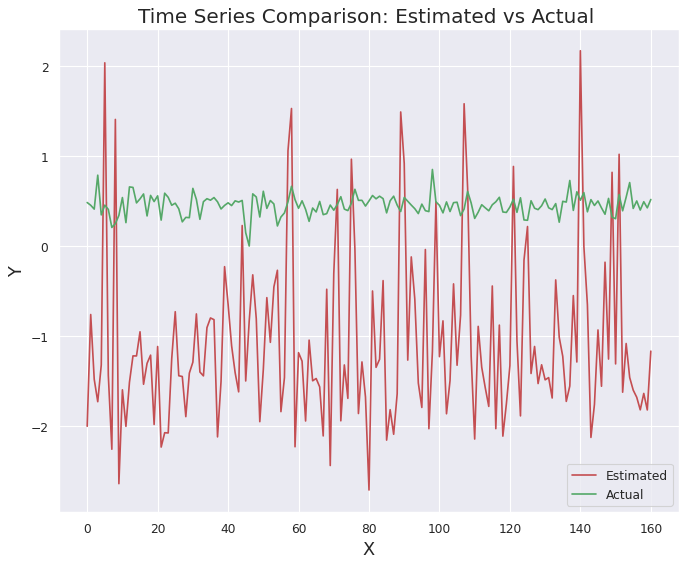

In [ ]:

compare_series(y_test, yEst)

Training Error:  3.41020930027763


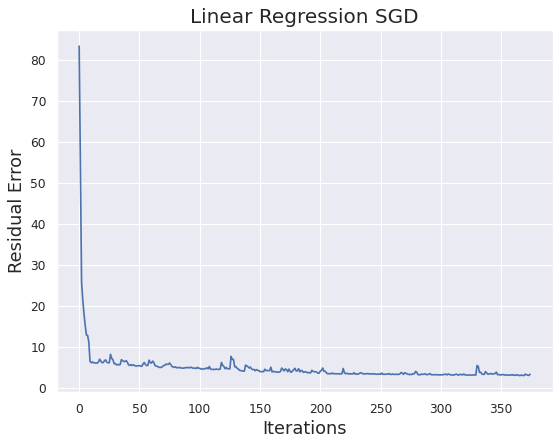

Residual Error:  8.86


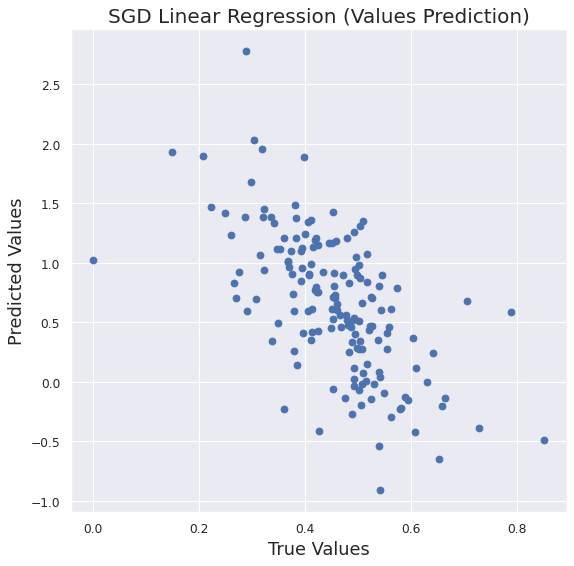

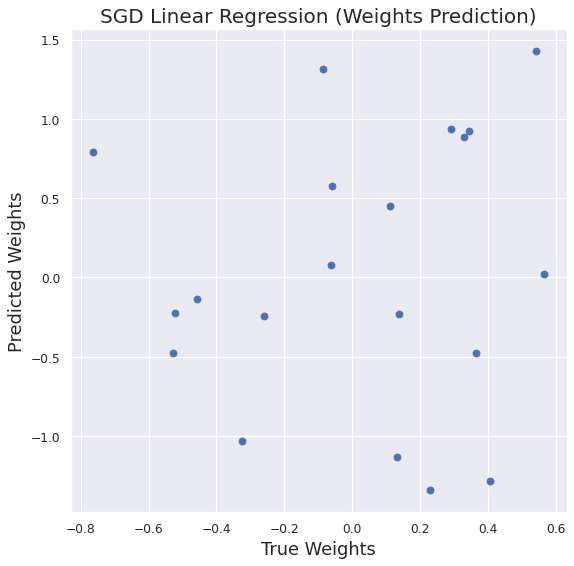

In [ ]:
wEst, Ep = sgd(U, y_train, N, 0.04, alpha=0, plot=True)
yEst = U_test @ wEst
print("Residual Error: ", round(np.linalg.norm(yEst - y_test), 3))
values_scatter('SGD Linear Regression', y_test, yEst)
weights_scatter('SGD Linear Regression', w, wEst)

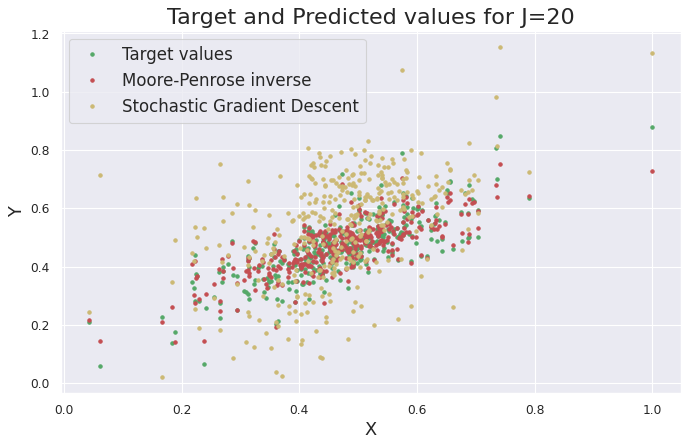

In [ ]:

y_sgd = U @ wEst

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Target and Predicted values for J="+str(J), fontsize=20)
plt.plot(y_train, yh_lin, '.', Color='g', label='Target values')
plt.plot(y_train, yh_rbf, '.', Color='r', label='Moore-Penrose inverse')
plt.plot(y_train, y_sgd, '.', Color = 'y', label='Stochastic Gradient Descent')
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.legend(fontsize=15)
plt.savefig('scatter.svg', format='svg', dpi=1200)
plt.show()

## **Option 2**

In [ ]:
df = pd.read_excel('data_akbilgic.xlsx', index_col=0, skiprows=[0])

(536, 8) (536, 1)
0.11118470448216607 0.1177350736371578


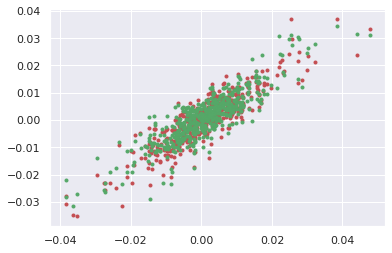

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rawData = df
N, pp1 = rawData.shape
# Last column is target
X = np.matrix(rawData.iloc[:,0:pp1-1])
y = np.matrix(rawData.iloc[:,pp1-1]).T
print(X.shape, y.shape)
# Solve linear regression, plot target and prediction
w = (np.linalg.inv(X.T*X)) * X.T * y
yh_lin = X*w
plt.plot(y, yh_lin, '.', Color='r')
# J = 20basis functions obtained by k-means clustering
# sigma set to standard deviation of entire data
from sklearn.cluster import KMeans
J = 20;
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)
# Construct design matrix
U = np.zeros((N,J))
for i in range(N):
  for j in range(J):
    U[i][j] = np.linalg.norm(X[i] - kmeans.cluster_centers_[j])
# Solve RBF model, predict and plot
w = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) * y
yh_rbf = np.dot(U,w)
plt.plot(y, yh_rbf, '.', Color='g')
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y-yh_rbf))
